In [8]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [10]:
sns.set_style('darkgrid')
pd.set_option.max_rows = 100
pd.set_option.max_columns = 23

In [11]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [12]:
df.shape

(8425, 23)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [14]:
df_num = [feature for feature in df.columns if df[feature].dtypes != 'O']
df_discrete=[feature for feature in df_num if len(df[feature].unique())<25]
df_cont = [feature for feature in df_num if feature not in df_discrete]
df_cat = [feature for feature in df.columns if feature not in df_num]
print("Numerical Features Count {}".format(len(df_num)))
print("Discrete feature Count {}".format(len(df_discrete)))
print("Continuous feature Count {}".format(len(df_cont)))
print("Categorical feature Count {}".format(len(df_cat)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [15]:
df_num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
df_discrete

['Cloud9am', 'Cloud3pm']

In [17]:
df_cont

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [18]:
df_cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
df.isnull().sum() / len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

## Visualization

MinTemp -0.08958808727464426
MaxTemp 0.3792968231234871
Rainfall 13.028837055151994
Evaporation 10.710605095349615
Sunshine -0.5197169160155558
WindGustSpeed 0.7111034739331797
WindSpeed9am 0.9562501983070706
WindSpeed3pm 0.491069296944368
Humidity9am -0.25584318964431935
Humidity3pm 0.11756306900468178
Pressure9am -0.022132678657320916
Pressure3pm -0.009385249554169993
Cloud9am -0.30941732532964533
Cloud3pm -0.23259766224129816
Temp9am -0.01469886955444272
Temp3pm 0.39506133261653315


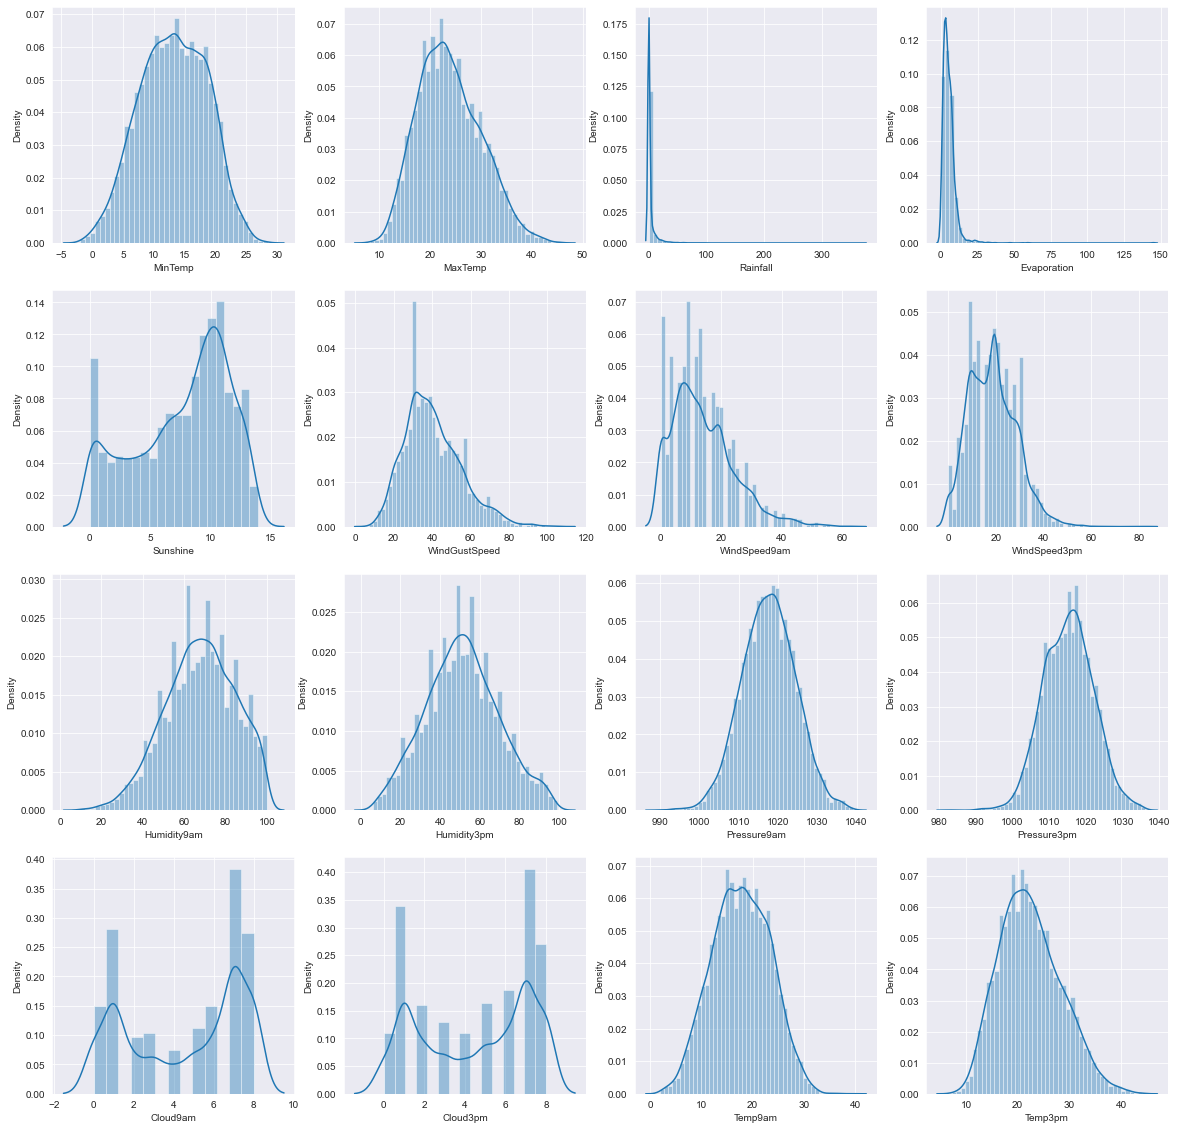

<Figure size 432x288 with 0 Axes>

In [20]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    if df[col].isnull().sum() > 0:
        print(col, df[col].skew())
        plt.subplot(4,4,i)
        sns.distplot(df[col])
        i = i+1
plt.show()
plt.tight_layout()

In [21]:
## random imputation for features with more than 20% null values

def randomimpu(col):
    random = df[col].dropna().sample(df[col].isnull().sum())
    random.index = df[df[col].isnull()][col].index
    df.loc[df[col].isnull(),col] = random

In [22]:
randomimpu('Evaporation')
randomimpu('Sunshine')
randomimpu('Cloud9am')
randomimpu('Cloud3pm')

In [23]:
df.isnull().sum() / len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [24]:
for col in df_num:
    if df[col].isnull().sum() > 0:
        if df[col].skew() > abs(0.5):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())

In [25]:
df[df_cat].isnull().sum() / len(df) * 100

Date             0.000000
Location         0.000000
WindGustDir     11.762611
WindDir9am       9.839763
WindDir3pm       3.655786
RainToday        2.848665
RainTomorrow     2.836795
dtype: float64

In [26]:
for col in df_cat:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        

In [27]:
df.isnull().sum().sum()

0

In [ ]:
#no null values

In [28]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,29.2,0.5,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,6.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.6,12.8,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,3.0,6.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,9.0,9.2,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,7.2,3.6,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,6.0,1.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,7.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


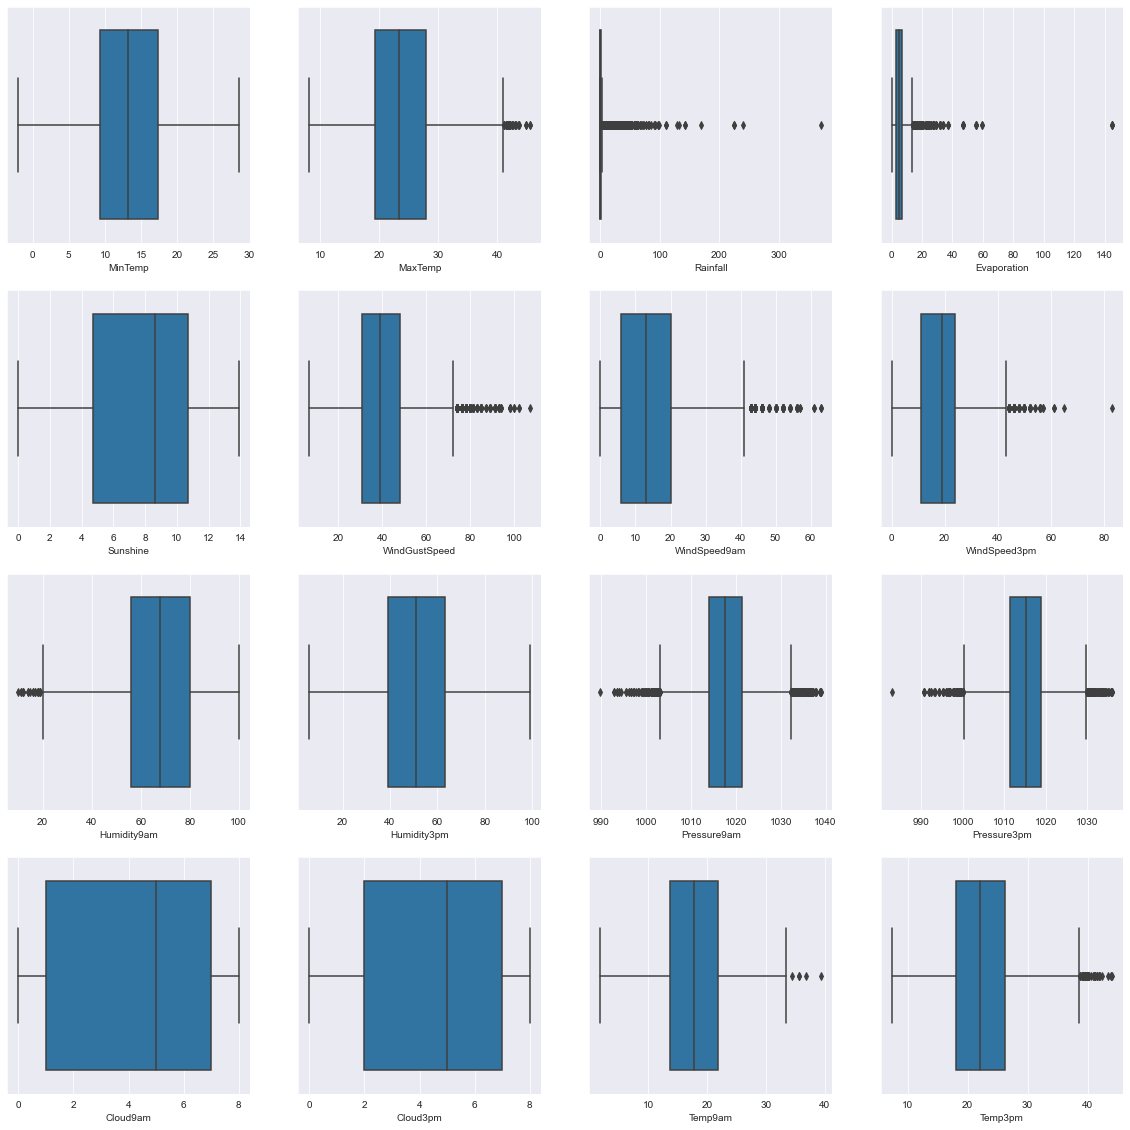

<Figure size 432x288 with 0 Axes>

In [29]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    i = i+1
plt.show()
plt.tight_layout()

In [30]:
for col in df_num:
    df[col]  = df[col].clip(lower = df[col].quantile(0.025),upper=df[col].quantile(0.975))

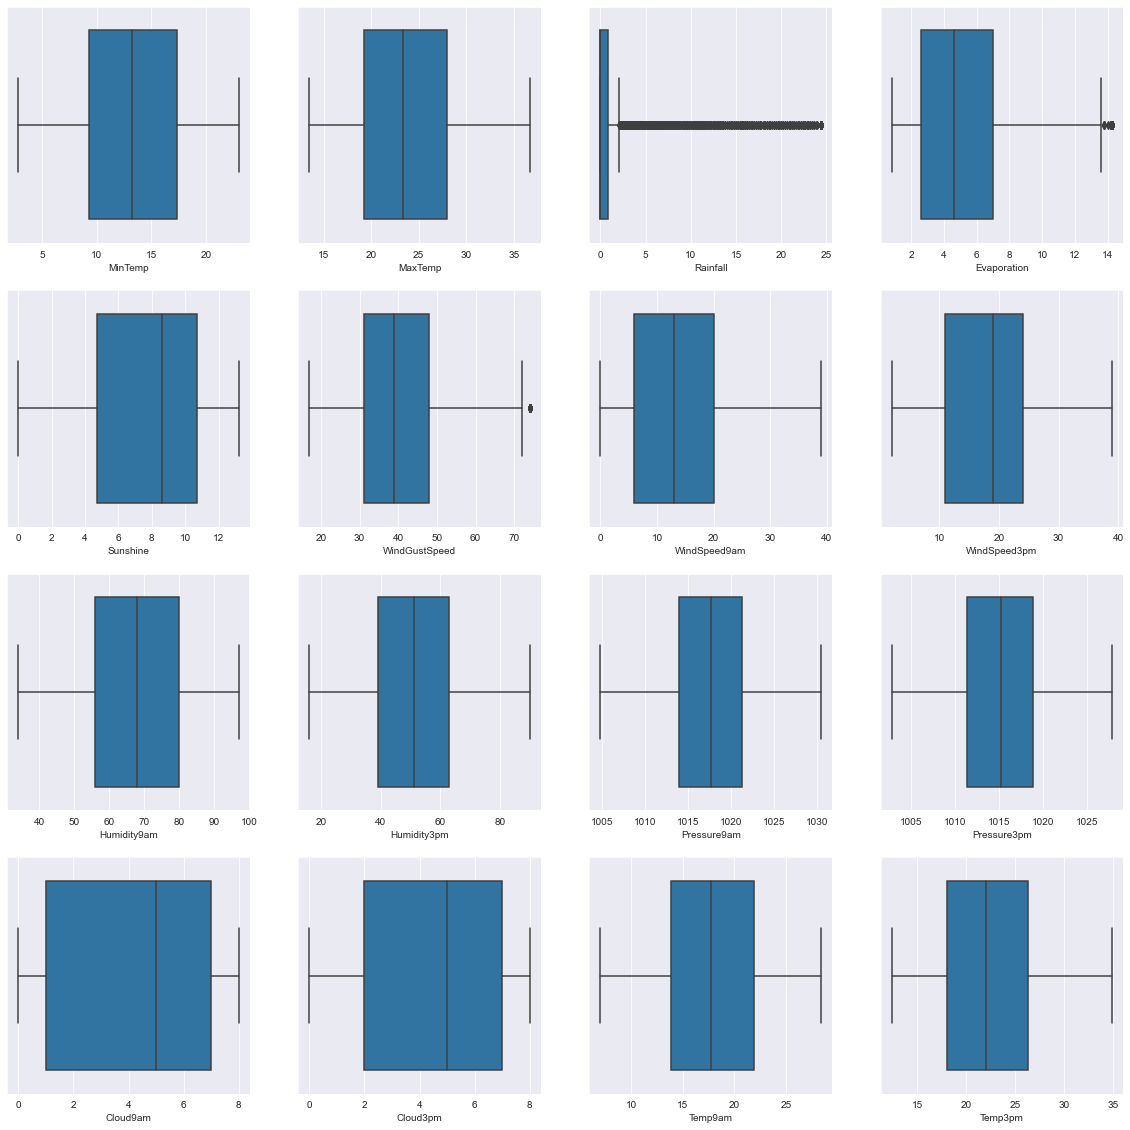

<Figure size 432x288 with 0 Axes>

In [31]:
i = 1
plt.figure(figsize=(20,20))
for col in df_num:
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    i = i+1
plt.show()
plt.tight_layout()

In [32]:
df[df_num].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.719867,0.101005,0.286918,0.032654,0.227313,0.135049,0.181216,-0.119195,0.084473,-0.433905,-0.427225,0.070899,0.038687,0.886055,0.688532
MaxTemp,0.719867,1.000000,-0.143091,0.350205,0.281642,0.134381,0.007861,0.087378,-0.379471,-0.411804,-0.336722,-0.415549,-0.223768,-0.201523,0.868145,0.974642
Rainfall,0.101005,-0.143091,1.000000,-0.043363,-0.157166,0.095133,0.056021,0.027320,0.322546,0.312639,-0.097250,-0.038371,0.209081,0.166080,-0.033138,-0.150605
Evaporation,0.286918,0.350205,-0.043363,1.000000,0.194080,0.171722,0.143986,0.112821,-0.246251,-0.174178,-0.199222,-0.207137,-0.068838,-0.100503,0.338921,0.339813
Sunshine,0.032654,0.281642,-0.157166,0.194080,1.000000,0.002466,-0.010795,0.027920,-0.264227,-0.321048,0.013539,-0.031013,-0.333806,-0.337065,0.184013,0.291559
WindGustSpeed,0.227313,0.134381,0.095133,0.171722,0.002466,1.000000,0.607570,0.648530,-0.270681,-0.093013,-0.400877,-0.363854,0.014540,0.065506,0.194902,0.098438
WindSpeed9am,0.135049,0.007861,0.056021,0.143986,-0.010795,0.607570,1.000000,0.564699,-0.359382,-0.106954,-0.171908,-0.131658,0.002381,0.034691,0.103921,-0.007179
WindSpeed3pm,0.181216,0.087378,0.027320,0.112821,0.027920,0.648530,0.564699,1.000000,-0.251148,-0.084513,-0.247290,-0.199166,0.001261,0.011973,0.184261,0.066486
Humidity9am,-0.119195,-0.379471,0.322546,-0.246251,-0.264227,-0.270681,-0.359382,-0.251148,1.000000,0.631870,0.142608,0.175114,0.356528,0.261991,-0.361835,-0.373317
Humidity3pm,0.084473,-0.411804,0.312639,-0.174178,-0.321048,-0.093013,-0.106954,-0.084513,0.631870,1.000000,0.003208,0.073963,0.367768,0.372675,-0.122751,-0.479761


In [33]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(df[df_num], 0.6)
len(set(corr_features))

7

In [35]:
corr_features

{'Humidity3pm',
 'MaxTemp',
 'Pressure3pm',
 'Temp3pm',
 'Temp9am',
 'WindSpeed3pm',
 'WindSpeed9am'}

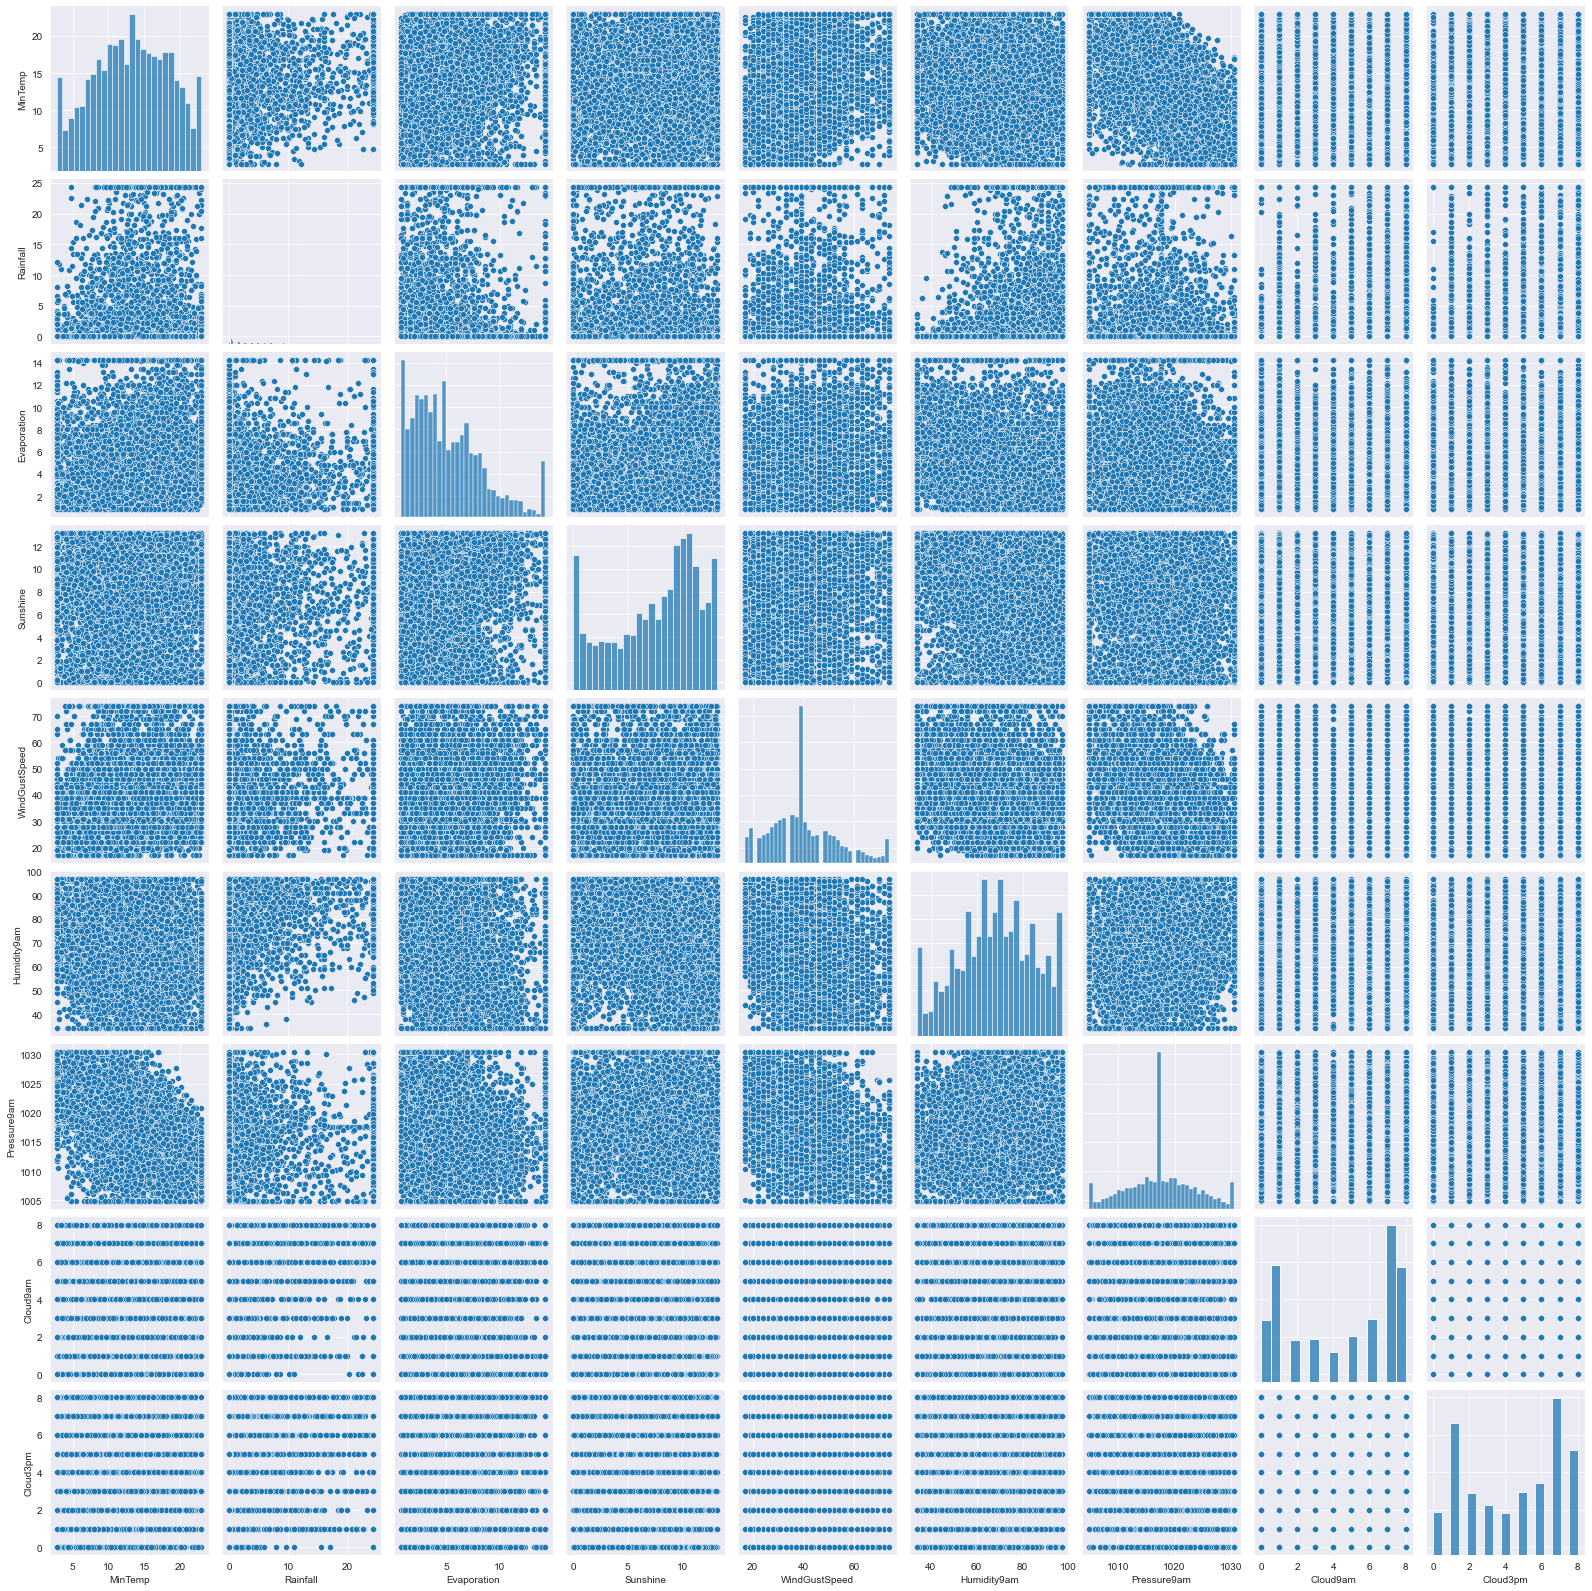

In [36]:
sns.pairplot(df[df_num].drop(corr_features, axis = 1))

In [ ]:
for feat in corr_features:
    df_num.remove(feat)

In [ ]:
for feat in corr_features:
    df_cont.remove(feat)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df_num


vif['VIF'] = [variance_inflation_factor(df[df_num].values,i) for i in range(df[df_num].shape[1])]

vif

,Features,VIF
0,MinTemp,8.465772
1,Rainfall,1.384520
2,Evaporation,4.213610
3,Sunshine,6.010843
4,WindGustSpeed,11.981843
5,Humidity9am,27.496184
6,Pressure9am,58.910055
7,Cloud9am,4.833296
8,Cloud3pm,4.828404


## Feature selection with anova

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [43]:
X = df[df_num]
y = df['RainTomorrow']

In [44]:
fs = SelectKBest(score_func=f_classif, k=7)
fs.fit_transform(X, y)
fs.scores_

array([ 73.45073628, 797.77692098,  31.50709841, 479.72530709,
       319.99983141, 688.34372497, 220.51346807, 491.26122156,
       750.8517816 ])

In [45]:
fs.pvalues_

array([1.21508859e-017, 9.01851370e-168, 2.05017000e-008, 1.81964602e-103,
       2.86064763e-070, 6.62945904e-146, 2.92450217e-049, 7.70288534e-106,
       1.99059172e-158])

In [46]:
cols = pd.DataFrame()
cols['Feature'] = df_num
cols['Fstat'] = fs.scores_
cols['Pvalues'] = fs.pvalues_
cols = cols.sort_values(by = 'Fstat', axis = 0, ascending = False)
cols

,Feature,Fstat,Pvalues
1,Rainfall,797.776921,9.018514e-168
8,Cloud3pm,750.851782,1.990592e-158
5,Humidity9am,688.343725,6.629459e-146
7,Cloud9am,491.261222,7.702885e-106
3,Sunshine,479.725307,1.819646e-103
4,WindGustSpeed,319.999831,2.860648e-70
6,Pressure9am,220.513468,2.924502e-49
0,MinTemp,73.450736,1.215089e-17
2,Evaporation,31.507098,2.050170e-08


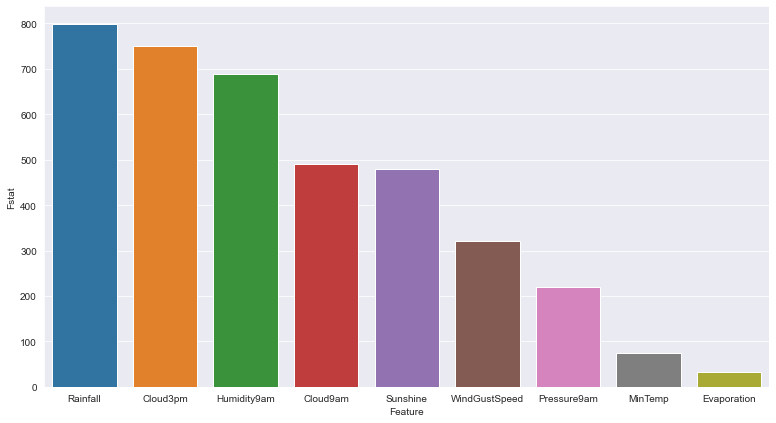

In [47]:
plt.figure(figsize=(13,7))
sns.barplot(cols['Feature'],cols['Fstat'])
plt.show()

In [48]:
fs.get_support(indices = True)

array([1, 3, 4, 5, 6, 7, 8], dtype=int64)

In [49]:
X.iloc[:,fs.get_support(indices = True)].columns

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Pressure9am',
       'Cloud9am', 'Cloud3pm'],
      dtype='object')

In [50]:
for col in df_num:
    if col not in X.iloc[:,fs.get_support(indices = True)].columns:
        df = df.drop(col,axis=1)

In [51]:
df.drop('Date', axis = 1, inplace = True)
df_cat.remove('Date')

In [52]:
for feat in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    df1 = df.groupby(feat)['RainTomorrow'].value_counts().unstack().iloc[:,1].sort_values(ascending= False)
    mydict = { j:i for i,j in (enumerate(df1.index,1))}
    df[feat] = df[feat].replace(mydict)

In [53]:
mydict = {'Yes':1, 'No':0}
df['RainToday'] = df['RainToday'].replace(mydict)
df['RainTomorrow'] = df['RainTomorrow'].replace(mydict)

In [54]:
df.head()

,Location,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,4,22.9,0.6,0.5,8,44.0,8,11,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,6.0,16.9,21.8,0,0
1,4,25.1,0.0,12.8,5,44.0,12,4,4.0,22.0,44.0,25.0,1010.6,1007.8,3.0,6.0,17.2,24.3,0,0
2,4,25.7,0.0,9.2,4,46.0,8,4,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,4,28.0,0.0,3.6,12,24.0,9,13,11.0,9.0,45.0,16.0,1017.6,1012.8,6.0,1.0,18.1,26.5,0,0
4,4,32.3,1.0,7.9,8,41.0,14,6,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [55]:
df[df_cat]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,4,8,8,11,0,0
1,4,5,12,4,0,0
2,4,4,8,4,0,0
3,4,12,9,13,0,0
4,4,8,14,6,0,0
...,...,...,...,...,...,...
8420,12,13,9,14,0,0
8421,12,15,9,3,0,0
8422,12,1,9,11,0,0
8423,12,9,13,3,0,0


In [56]:
X = df[df_cat].drop('RainTomorrow',1)
y = df['RainTomorrow']

In [57]:
fs = SelectKBest(score_func=chi2, k=3)
fs.fit_transform(X, y)
fs.scores_

array([  5.60488654,  82.83031455, 187.94724843,  32.51813019,
       630.14626161])

In [58]:
fs.pvalues_

array([1.79104547e-002, 8.94082327e-020, 8.92102729e-043, 1.18085759e-008,
       4.64526817e-139])

In [59]:
cols = pd.DataFrame()
cols['Feature'] = df[df_cat].drop('RainTomorrow',1).columns
cols['Fstat'] = fs.scores_
cols['Pvalues'] = fs.pvalues_
cols = cols.sort_values(by = 'Fstat', axis = 0, ascending = False)
cols

,Feature,Fstat,Pvalues
4,RainToday,630.146262,4.645268e-139
2,WindDir9am,187.947248,8.921027e-43
1,WindGustDir,82.830315,8.940823e-20
3,WindDir3pm,32.518130,1.180858e-08
0,Location,5.604887,1.791045e-02


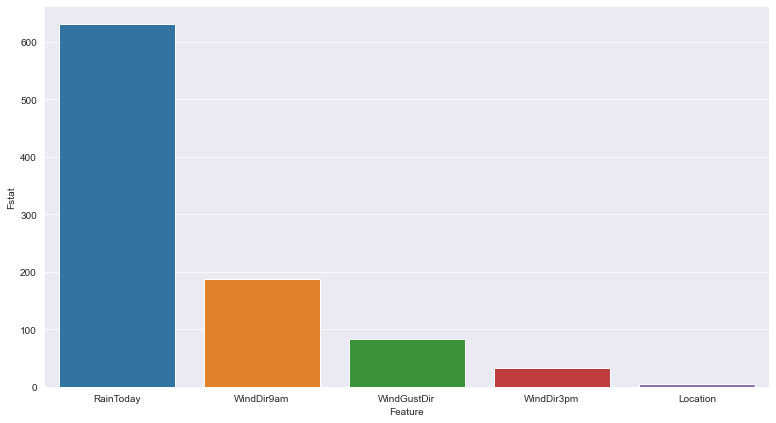

In [60]:
plt.figure(figsize=(13,7))
sns.barplot(cols['Feature'],cols['Fstat'])
plt.show()

In [61]:
X.iloc[:,fs.get_support(indices = True)].columns

Index(['WindGustDir', 'WindDir9am', 'RainToday'], dtype='object')

In [62]:
df_cat.remove('RainTomorrow')

In [63]:
for col in df_cat:
    if col not in X.iloc[:,fs.get_support(indices = True)].columns:
        df = df.drop(col,axis=1)

In [64]:
df.head()

,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,22.9,0.6,0.5,8,44.0,8,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,6.0,16.9,21.8,0,0
1,25.1,0.0,12.8,5,44.0,12,4.0,22.0,44.0,25.0,1010.6,1007.8,3.0,6.0,17.2,24.3,0,0
2,25.7,0.0,9.2,4,46.0,8,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,28.0,0.0,3.6,12,24.0,9,11.0,9.0,45.0,16.0,1017.6,1012.8,6.0,1.0,18.1,26.5,0,0
4,32.3,1.0,7.9,8,41.0,14,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, plot_roc_curve

In [66]:
X = df.drop('RainTomorrow', 1)
y = df['RainTomorrow']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)

In [68]:
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTETomek(random_state=0)
x_sam, y_sam = sm.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_sam)))

The number of classes before fit Counter({0: 4499, 1: 1398})
The number of classes after fit Counter({0: 4485, 1: 4485})


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [102]:
models = [LogisticRegression(random_state=0),DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0),AdaBoostClassifier(random_state=0),GradientBoostingClassifier(random_state=0),XGBClassifier(random_state=0),GaussianNB()]


In [103]:
def base_models(model,X_sam, X_test, y_sam, y_test):
    ml_model = model.fit(X_sam,y_sam)
    
    y_pred = ml_model.predict(X_test)
    
    print(f' MODEL : {model}')
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n\n')

In [104]:
for model in models:
    base_models(model,x_sam, X_test, y_sam, y_test)

 MODEL : LogisticRegression(random_state=0)
[[1491  444]
 [ 149  444]]
0.7654272151898734
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1935
           1       0.50      0.75      0.60       593

    accuracy                           0.77      2528
   macro avg       0.70      0.76      0.72      2528
weighted avg       0.81      0.77      0.78      2528




 MODEL : DecisionTreeClassifier(random_state=0)
[[1627  308]
 [ 207  386]]
0.7962816455696202
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1935
           1       0.56      0.65      0.60       593

    accuracy                           0.80      2528
   macro avg       0.72      0.75      0.73      2528
weighted avg       0.81      0.80      0.80      2528




 MODEL : RandomForestClassifier(random_state=0)
[[1793  142]
 [ 178  415]]
0.8734177215189873
              precision    recall  f1-score   support

       

In [105]:
from sklearn.model_selection import GridSearchCV
grid = {'max_depth' : [8,9,10,11],   # It represents the depth of each tree, which is the maximum number of different features used in each tree
'learning_rate':np.linspace(0.1,0.01,5),  # impact of each tree on the final prediction. lesser the better (0.1 to 0.01)
'subsample':[0.8,0.9,1], # number of rows taken as sample for each tree. take from 0.8 to 1
'colsample_bytree':[0.3,0.5,0.7, 0.8], # number of columns taken for each tree.Values from 0.3 to 0.8 if you have many columns (especially if you did one-hot encoding), or 0.8 to 1 if you only have a few columns.
'gamme':[0,1,5]}

In [95]:
import multiprocessing
# n_jobs = multiprocessing.cpu_count()-1

In [106]:
xg_model = XGBClassifier(random_state=0)
grid_cv = GridSearchCV(estimator=xg_model, param_grid=grid,cv = 3, n_jobs=1,scoring='accuracy')
# grid_cv.fit(X_train,y_train)

In [ ]:
grid_cv.fit(X_train,y_train)

In [ ]:
xg_model = XGBClassifier(random_state=0)
grid_cv = GridSearchCV(estimator=xg_model, param_grid=grid,cv = 3)
grid_cv.fit(X_train,y_train)

In [108]:
grid_cv.best_params_

{'colsample_bytree': 0.8,
 'gamme': 0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'subsample': 0.9}

In [109]:
final_model= XGBClassifier(random_state=0,colsample_bytree = 0.8,gamma= 0, learning_rate= 0.1,max_depth= 8,subsample =1)
final_model = final_model.fit(x_sam,y_sam)
    
y_pred = final_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('\n\n')

[11:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1820  115]
 [ 214  379]]
0.8698575949367089
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1935
           1       0.77      0.64      0.70       593

    accuracy                           0.87      2528
   macro avg       0.83      0.79      0.81      2528
weighted avg       0.86      0.87      0.87      2528

0.7898457891594878





In [110]:
rf_model = RandomForestClassifier(random_state=0).fit(x_sam,y_sam)
y_pred = rf_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('\n\n')

[[1793  142]
 [ 178  415]]
0.8734177215189873
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1935
           1       0.75      0.70      0.72       593

    accuracy                           0.87      2528
   macro avg       0.83      0.81      0.82      2528
weighted avg       0.87      0.87      0.87      2528

0.8132231765080112





In [111]:
from sklearn.model_selection import GridSearchCV

grid = {'max_depth' : [10,15,20,25,30],
'min_samples_leaf' : [10,20,30,40,50],
'max_samples' : [0.2,0.4,0.6,0.8],
'max_features' : ['auto', 'sqrt', 'log2'],
'criterion' : ["gini", "entropy"] }

In [112]:
rf_model = RandomForestClassifier()
grid_cv = GridSearchCV(estimator=rf_model, param_grid=grid,cv = 3, n_jobs=-1,scoring='accuracy')
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [113]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'log2',
 'max_samples': 0.8,
 'min_samples_leaf': 10}

In [114]:
rf_model = RandomForestClassifier(random_state = 0,criterion = 'gini', max_depth= 30, max_features = 'log2', max_samples = 0.8, min_samples_leaf = 10)
rf_model.fit(x_sam,y_sam)
y_pred = rf_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('\n\n')

[[1666  269]
 [ 172  421]]
0.8255537974683544
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1935
           1       0.61      0.71      0.66       593

    accuracy                           0.83      2528
   macro avg       0.76      0.79      0.77      2528
weighted avg       0.84      0.83      0.83      2528

0.7854656609627393





In [ ]:
#Saving the model

In [116]:
import pickle

In [117]:
pickle.dump(rf_model,open('randomforest.pkl','wb'))

In [118]:
model = pickle.load(open('randomforest.pkl','rb'))

In [119]:
y_pred1 = rf_model.predict(X_test)
    
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(roc_auc_score(y_test,y_pred1))
print('\n\n')

[[1666  269]
 [ 172  421]]
0.8255537974683544
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1935
           1       0.61      0.71      0.66       593

    accuracy                           0.83      2528
   macro avg       0.76      0.79      0.77      2528
weighted avg       0.84      0.83      0.83      2528

0.7854656609627393



